In [4]:
# =============================================================================
# # 1. SETUP: IMPORTING LIBRARIES
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Set a visual style for the plots
sns.set_style("whitegrid")

In [11]:
# =============================================================================
# # 2. DATA LOADING AND CLEANING
# =============================================================================
# Load the dataset from your uploaded file 'HousingData.csv'
try:
    # --- THIS IS THE FIX ---
    # We tell pandas to recognize 'NA' as a missing (null) value
    df = pd.read_csv('data/HousingData.csv', na_values='NA')
except FileNotFoundError:
    print("Error: 'HousingData.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# Let's standardize the column names to lowercase for easier access
df.columns = df.columns.str.lower()

print("--- First 5 Rows of the Dataset ---")
print(df.head())
print("\n" + "="*50 + "\n")

# Check for missing values (now 'NA' will be correctly identified as NaN)
print("--- Missing Values Before Cleaning ---")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# --- Handle Missing Values ---
# This part of the code now works correctly because the nulls are properly identified.
# We will fill them with the median of each column.
for col in df.columns:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

print("--- Missing Values After Cleaning ---")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

--- First 5 Rows of the Dataset ---
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


--- Missing Values Before Cleaning ---
crim       20
zn         20
indus      20
chas       20
nox         0
rm          0
age        20
dis         0
rad         0
tax         0
ptratio     0
b           0
lstat      20
medv        0
dtype: int64


--- Missing Values After Cleaning ---
crim       0
zn         0
indus      0
chas

C:\Users\RIYA\AppData\Local\Temp\ipykernel_15484\2170514209.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\RIYA\AppData\Local\Temp\ipykernel_15484\2170514209.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

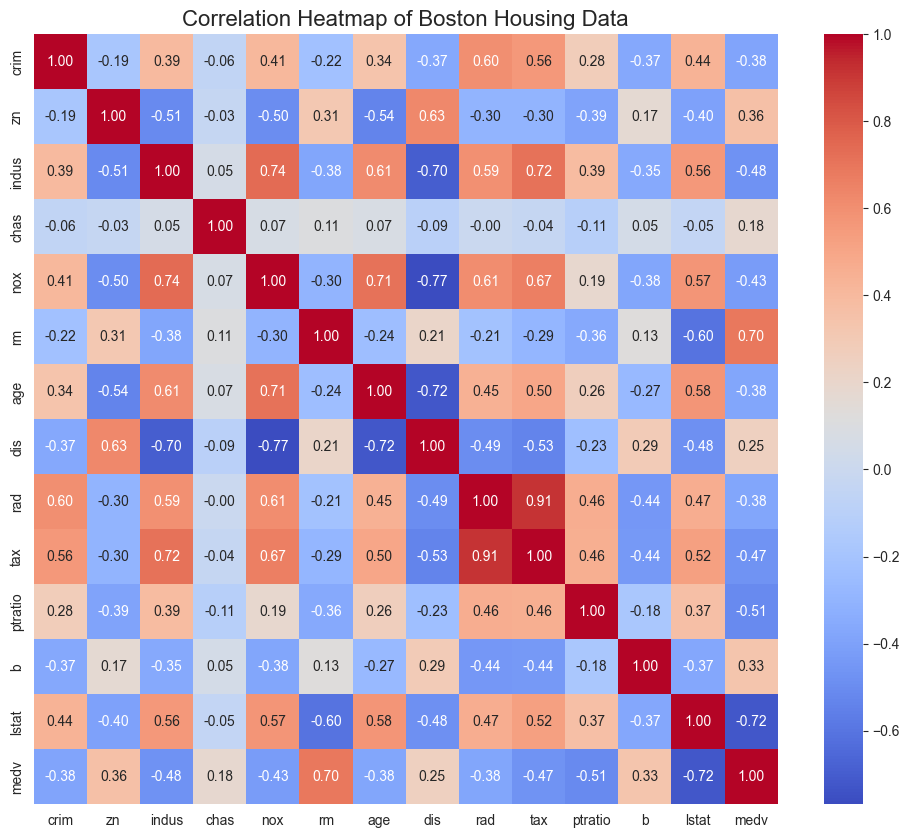

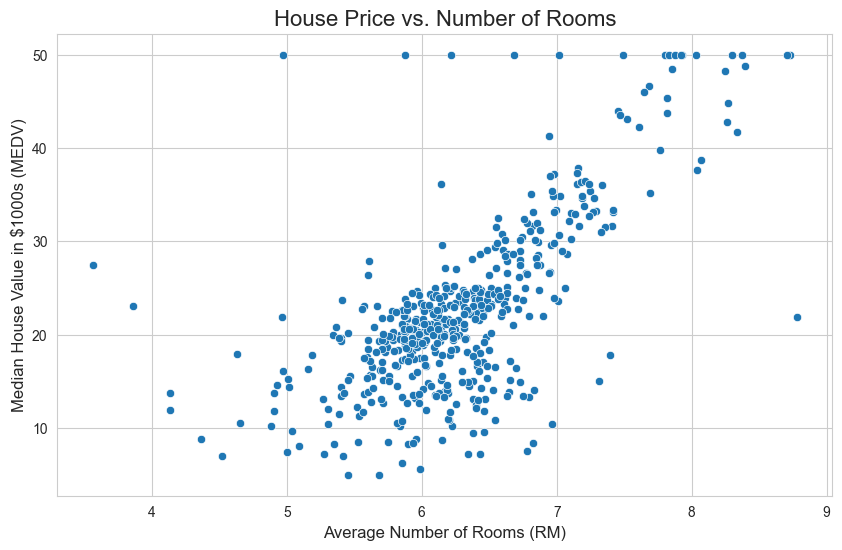

In [12]:
# =============================================================================
# # 3. EXPLORATORY DATA ANALYSIS (EDA)
# =============================================================================
# A correlation heatmap is essential for multiple regression.
# It helps visualize the relationships between all variables.
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Boston Housing Data', fontsize=16)
plt.savefig('correlation_heatmap.png')
plt.show()
# Insight: We can see that 'rm' (rooms) has a strong positive correlation with 'medv' (price),
# and 'lstat' (% lower status of the population) has a strong negative correlation.

# Let's visualize the relationship between the number of rooms and the price.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rm', y='medv', data=df)
plt.title('House Price vs. Number of Rooms', fontsize=16)
plt.xlabel('Average Number of Rooms (RM)', fontsize=12)
plt.ylabel('Median House Value in $1000s (MEDV)', fontsize=12)
plt.show()

In [13]:
# =============================================================================
# # 4. DATA PREPARATION
# =============================================================================
# Define our features (X) and target (y)
# We will use all columns except the target 'medv' as our features.
X = df.drop('medv', axis=1)
y = df['medv']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("--- Data Splitting ---")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

--- Data Splitting ---
Training set size: 354 samples
Testing set size: 152 samples


In [14]:
# =============================================================================
# # 5. TRAINING THE MULTIPLE LINEAR REGRESSION MODEL
# =============================================================================
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("--- Model Training Complete ---")

--- Model Training Complete ---


--- Model Coefficients ---
         Coefficient
crim       -0.124672
zn          0.030359
indus      -0.007932
chas        3.739306
nox       -13.877298
rm          4.383637
age        -0.024330
dis        -1.407211
rad         0.190584
tax        -0.007088
ptratio    -0.890431
b           0.011529
lstat      -0.481030

Interpretation: For example, a 1-unit increase in 'rm' (number of rooms) is associated with a $4383.64 increase in the median house value, holding all other features constant.


<Figure size 1200x800 with 0 Axes>

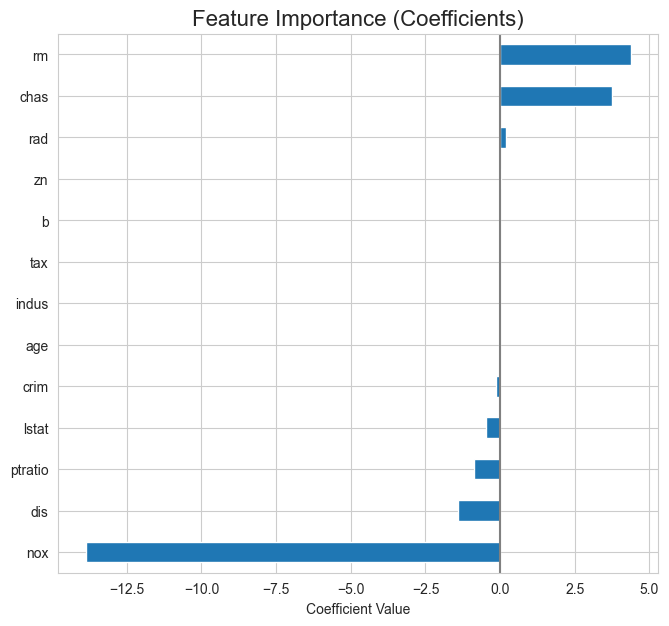

In [15]:
# =============================================================================
# # 6. MODEL INTERPRETATION: UNDERSTANDING FEATURE IMPORTANCE
# =============================================================================
# The coefficients tell us the effect of each feature on the house price.
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Model Coefficients :-")
print(coefficients)
print("\nInterpretation: For example, a 1-unit increase in 'rm' (number of rooms) is associated with a",
      f"${coefficients.loc['rm'].values[0]*1000:.2f} increase in the median house value, holding all other features constant.")


# Visualize the coefficients to easily see feature importance
plt.figure(figsize=(12, 8))
coefficients.sort_values(by='Coefficient').plot(kind='barh', figsize=(10, 7), legend=None)
plt.title('Feature Importance (Coefficients)', fontsize=16)
plt.xlabel('Coefficient Value')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)
plt.savefig('feature_importance.png')
plt.show()

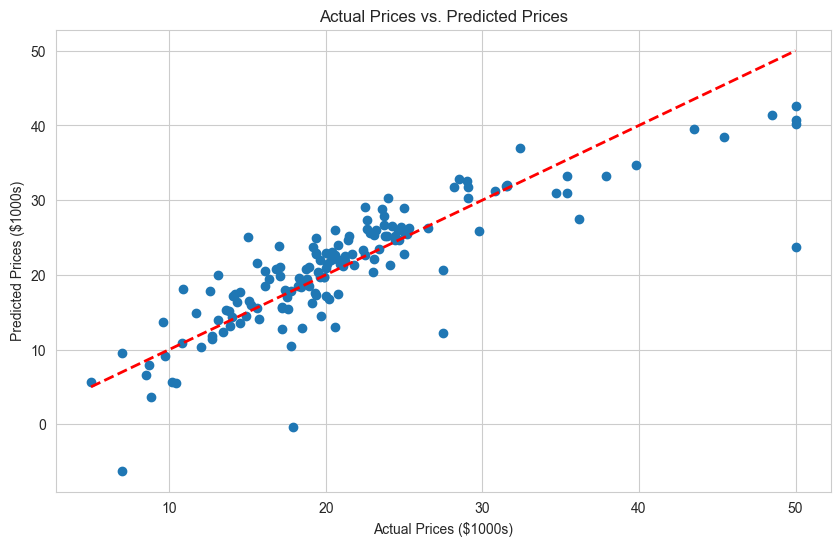

--- Model Evaluation Metrics ---
Mean Absolute Error (MAE): $3,140.75
Root Mean Squared Error (RMSE): $4,667.37
R-squared (R²): 0.71

Interpretation: The R² value of 0.71 means that our model can explain approximately 71% of the variation in Boston house prices.


In [16]:
# =============================================================================
# # 7. MAKING PREDICTIONS & EVALUATING THE MODEL
# =============================================================================
# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices ($1000s)")
plt.ylabel("Predicted Prices ($1000s)")
plt.title("Actual Prices vs. Predicted Prices")
# Plot a line for perfect predictions (y_test = y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.savefig('actual_vs_predicted.png')
plt.show()

# Evaluate the model's performance
print("--- Model Evaluation Metrics ---")
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): ${mae*1000:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse*1000:,.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"\nInterpretation: The R² value of {r2:.2f} means that our model can explain approximately {r2*100:.0f}% of the variation in Boston house prices.")